# Scratchpad notebook

- Scratchpad and notes to break down the data

In [1]:
import pandas as pd

from blockchain_stackoverflow import entertain_me
from blockchain_stackoverflow.helpers import clip_to_data_available_period

entertain_me()  # Initialise notebook output

# Load our data
df = pd.read_parquet("blockchain-questions.parquet")
df["CreationDate"] = pd.to_datetime(df["CreationDate"], format='ISO8601')
df = clip_to_data_available_period(df)

## Monthly binning and comparison practice


In [2]:
# Bin posts by month
from blockchain_stackoverflow.helpers import bin_to_time, get_posts_by_tags

bitcoin = get_posts_by_tags(df, ("bitcoin",))
ethereum = get_posts_by_tags(df, ("ethereum",))
solana = get_posts_by_tags(df, ("solana",))
near = get_posts_by_tags(df, ("near", "nearprotocol"))

bitcoin_binned = bin_to_time(bitcoin)

bitcoin_binned


CreationDate
2011-03-01     2
2011-06-01    10
2011-09-01     5
2011-12-01     5
2012-03-01     5
2012-06-01     6
2012-09-01     3
2012-12-01    10
2013-03-01    22
2013-06-01    23
2013-09-01    45
2013-12-01    88
2014-03-01    63
2014-06-01    39
2014-09-01    39
2014-12-01    38
2015-03-01    40
2015-06-01    28
2015-09-01    36
2015-12-01    36
2016-03-01    23
2016-06-01    51
2016-09-01    42
2016-12-01    31
2017-03-01    30
2017-06-01    84
2017-09-01    73
2017-12-01    93
2018-03-01    64
2018-06-01    46
2018-09-01    41
2018-12-01    38
2019-03-01    40
2019-06-01    39
2019-09-01    49
2019-12-01    33
2020-03-01    54
2020-06-01    34
2020-09-01    25
2020-12-01    49
2021-03-01    58
2021-06-01    33
2021-09-01    32
2021-12-01    26
2022-03-01    29
2022-06-01    23
2022-09-01    21
2022-12-01    23
2023-03-01    25
Freq: QS-MAR, Name: post_count, dtype: int64

In [3]:
# Bundle several tags to a single dataframe
quaterly_binned = pd.DataFrame(
    data = {
        "bitcoin": bin_to_time(bitcoin),
        "ethereum": bin_to_time(ethereum),
        "solana": bin_to_time(solana),
        "near": bin_to_time(near),
    },
)

quaterly_binned


,bitcoin,ethereum,solana,near
CreationDate,,,,
2011-03-01,2,NaN,NaN,NaN
2011-06-01,10,NaN,NaN,NaN
2011-09-01,5,NaN,NaN,NaN
2011-12-01,5,NaN,NaN,NaN
2012-03-01,5,NaN,NaN,NaN
2012-06-01,6,NaN,NaN,NaN
2012-09-01,3,NaN,NaN,NaN
2012-12-01,10,NaN,NaN,NaN
2013-03-01,22,NaN,NaN,NaN


Text(0, 0.5, 'StackOverflow posts per quarter')

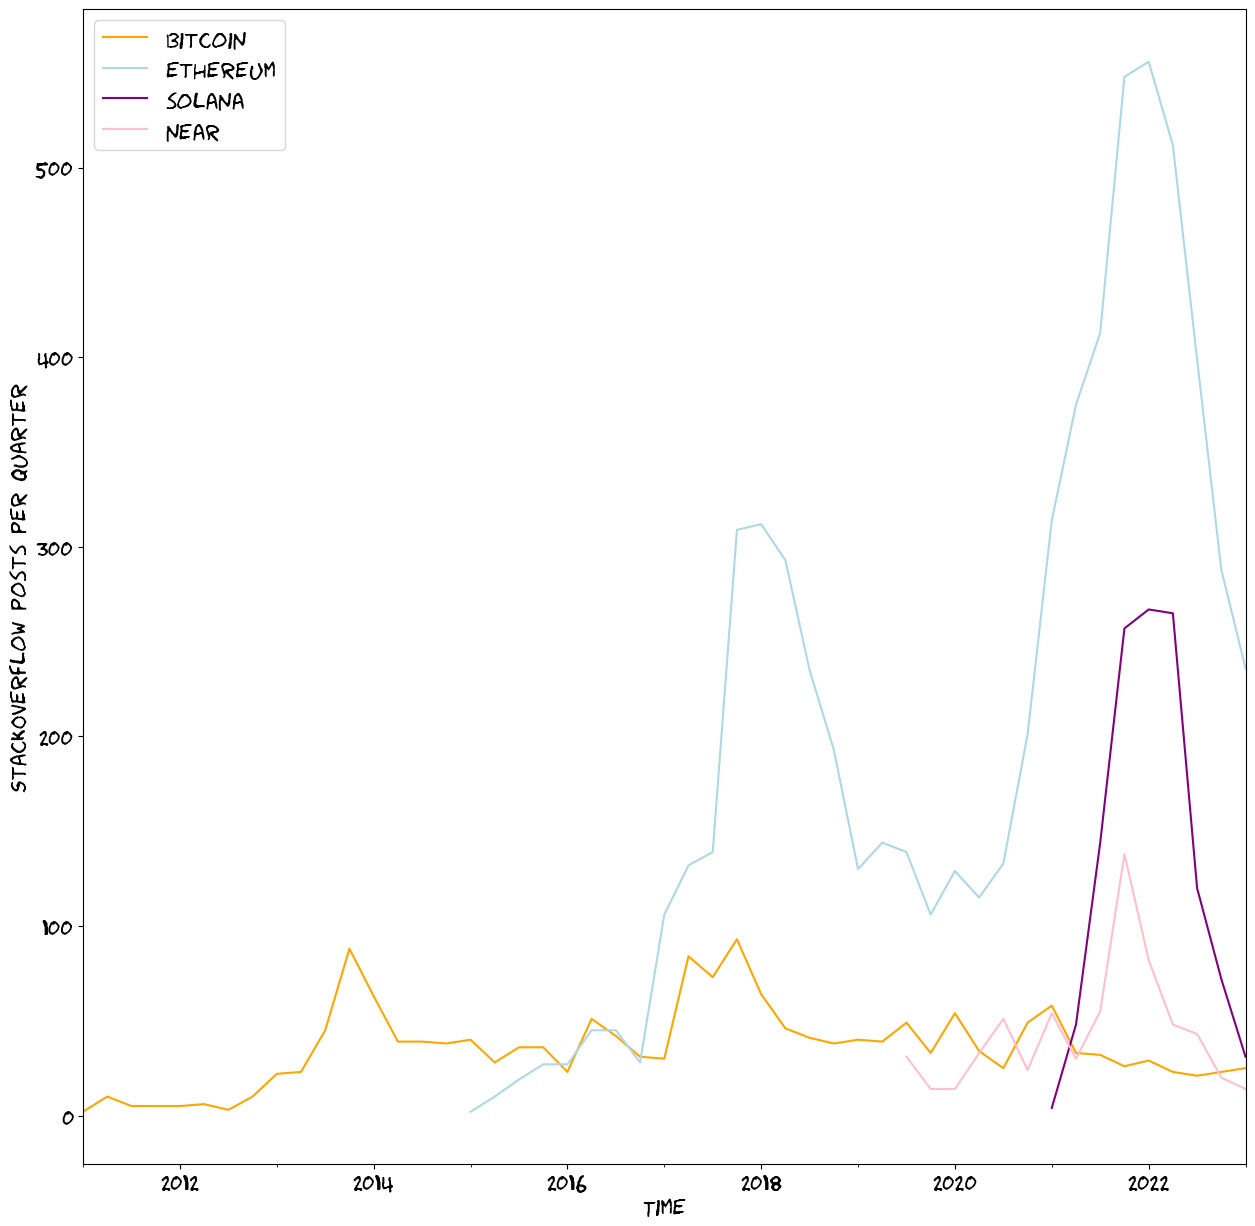

In [4]:
ax = quaterly_binned.plot.line(
    color={
        "bitcoin": "orange",
        "ethereum": "lightblue",
        "solana": "purple",
        "near": "pink",
    }
)

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# StackOverflow overall adjusted

- Show stackoverflow decline and adjust tag popularity against it

In [5]:
# overall_posts = pd.read_parquet("post_counts_quarterly.parquet")


# Kindlings

- New blockchains that are gaining traction, have not yet gained traction or never gained traction

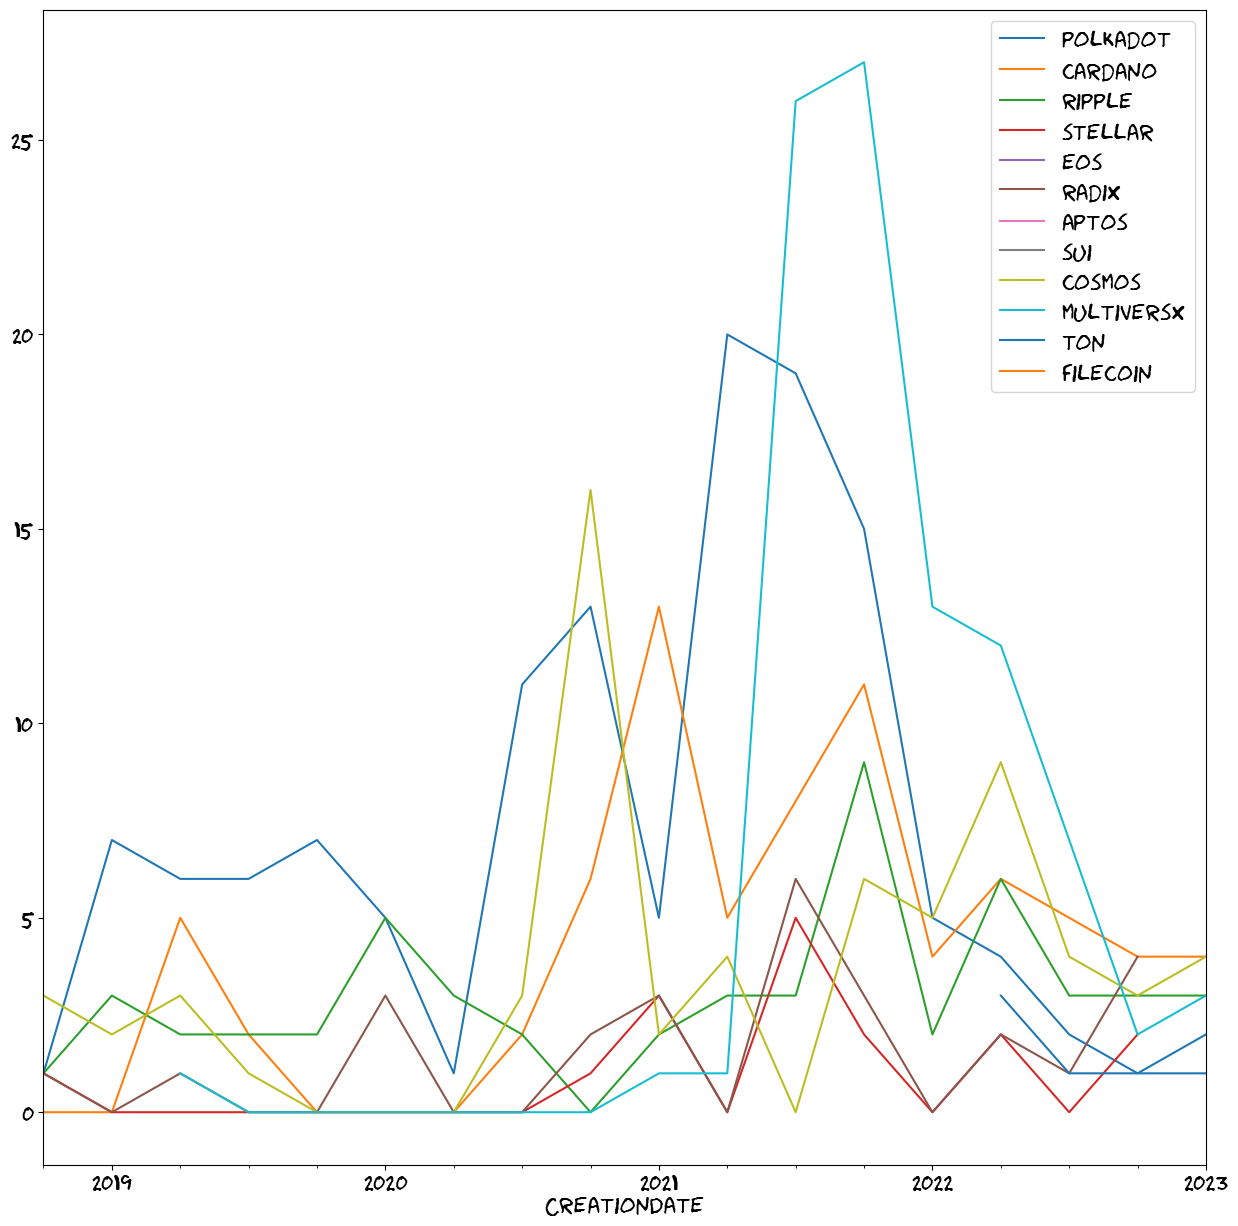

In [9]:
from blockchain_stackoverflow.helpers import create_binned_df_by_tags

quaterly_binned = create_binned_df_by_tags(df, {
    "polkadot": ("polkadot", "substrate", "polkadot-js"),
    "cardano": ("cardano",),
    "ripple": ("xrp", "rippled"),
    "stellar": ("stellar"),
    "eos": ("eos"),
    # "near": ("nearprotocol", "near"),
    "radix": ("scrypto"),
    "aptos": ("aptos"),
    "sui": ("sui"),
    "cosmos": ("cosmos-sdk", "cosmwasm", "tendermint"),
    "multiversx": ("elrond",),
    "ton": ("ton",),
    "filecoin": ("filecoin",),
})

quaterly_binned

# print(quaterly_binned)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")